<a href="https://colab.research.google.com/github/yashikasingh6499/Face-Detection-and-Recognition/blob/master/INTERNSHALA_0820_ASSIGN1_YASHIKA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install face_recognition

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
cd"/content/drive/My Drive"

/content/drive/My Drive


HOG Features


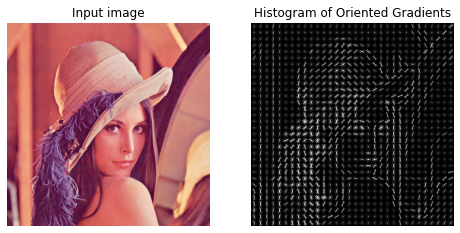

In [13]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data,exposure
import cv2

image = cv2.imread("lena.png")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

fd,hog_image = hog(image, orientations=8 ,pixels_per_cell =(16,16),cells_per_block = (1,1),visualize = True, multichannel = True  )

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(8,4),sharex=True,sharey=True)

ax1.axis('off')
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title('Input image')

hog_image_rescaled = exposure.rescale_intensity(hog_image,in_range=(0,10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled,cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()


In [ ]:
len(fd)

8192

In [ ]:
image.shape

(512, 512, 3)

Face Detection

In [ ]:
!pip install face_recognition

In [14]:
import face_recognition

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

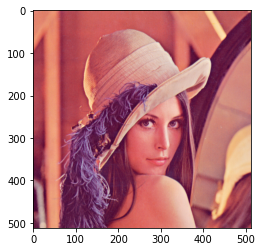

In [51]:
image = cv2.imread("lena.png")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [52]:
face_locations = face_recognition.face_locations(image)

number_of_faces = len(face_locations)
print("Found {} face(s) in input image.".format(number_of_faces))

Found 1 face(s) in input image.


A face is located at pixel location Top:218, Left:219, Bottom:373, Right:374


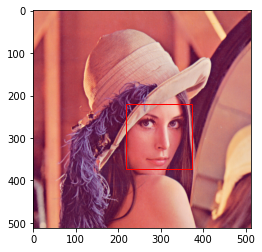

In [53]:
plt.imshow(image)
ax = plt.gca()

for face_location in face_locations:
  top,right,bottom,left = face_location
  x,y,w,h = left,top,right,bottom

  print("A face is located at pixel location Top:{}, Left:{}, Bottom:{}, Right:{}".format(x,y,w,h))

  rect = Rectangle((x,y),w-x,h-y,fill = False,color = "red")
  ax.add_patch(rect)

  plt.show()

Face Recognition

In [10]:
import face_recognition

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

In [11]:
cd"/content/drive/My Drive/Images"

/content/drive/My Drive/Images


In [54]:
image = cv2.imread("face_demo.jpg")
face_demo = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image = cv2.imread("Chris-Hemsworth.jpg")
chris = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image = cv2.imread("ian.jpg")
ian = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image = cv2.imread("tom-ellis.jpg")
tom = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [55]:
face_demo_encoding = face_recognition.face_locations(face_demo)[0]
chris_encoding = face_recognition.face_locations(chris)[0]
ian_encoding = face_recognition.face_locations(ian)[0]
tom_encoding = face_recognition.face_locations(tom)[0]

known_face_encodings = [
      face_demo_encoding,
      chris_encoding,
      ian_encoding,
      tom_encoding
]

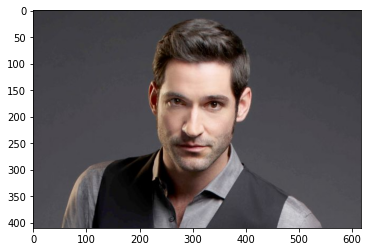

In [56]:
image = cv2.imread("unknown.jpg")
unknown_img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(unknown_img)

unknown_face_encodings = face_recognition.face_locations(unknown_img)


In [59]:
from scipy.spatial import distance

for unknown_face_encoding in unknown_face_encodings:
  results = []
  for known_face_encoding in known_face_encodings:
    d = distance.euclidean(known_face_encoding,unknown_face_encoding)
    #print("Euclidean distance: ",d)
    results.append(d)
  threshold = 62 #Since for the dataset here, this was the appropriate threshold.
  results = np.array(results) <= threshold

  name = "Unknown"

  if results[0]:
    name = "Face demo"
  elif results[1]:
    name = "Chris Hemsworth"
  elif results[2]:
    name = "Ian Somerhalder"
  elif results[3]:
    name = "Tom Ellis"

print(f"OMG! Found {name} in the photo.")

OMG! Found Tom Ellis in the photo.


Playing with facial landmarks

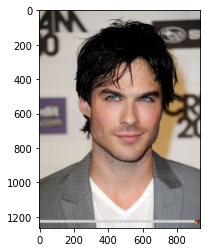

In [74]:
image = cv2.imread("ian.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [75]:
face_landmarks_list = face_recognition.face_landmarks(image)

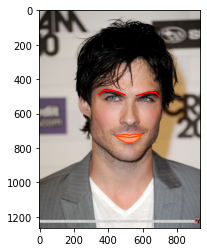

In [76]:
import matplotlib.lines as mlines
from matplotlib.patches import Polygon

plt.imshow(image)
ax = plt.gca()

for face_landmarks in face_landmarks_list:
  left_eyebrow_pts = face_landmarks['left_eyebrow']
  pre_x,pre_y = left_eyebrow_pts[0]
  for (x,y) in left_eyebrow_pts[1:]:
    l = mlines.Line2D([pre_x,x],[pre_y,y],color="red")
    ax.add_line(l)
    pre_x,pre_y = x,y

  right_eyebrow_pts = face_landmarks['right_eyebrow']
  pre_x,pre_y = right_eyebrow_pts[0]
  for (x,y) in right_eyebrow_pts[1:]:
    l = mlines.Line2D([pre_x,x],[pre_y,y],color="red")
    ax.add_line(l)
    pre_x,pre_y = x,y

  p = Polygon(face_landmarks['top_lip'],facecolor='lightsalmon',edgecolor='orangered')
  ax.add_patch(p)
  p = Polygon(face_landmarks['bottom_lip'],facecolor='lightsalmon',edgecolor='orangered')
  ax.add_patch(p)

plt.show()
